In [4]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from bmcs_cross_section.api import AnaFRPBending

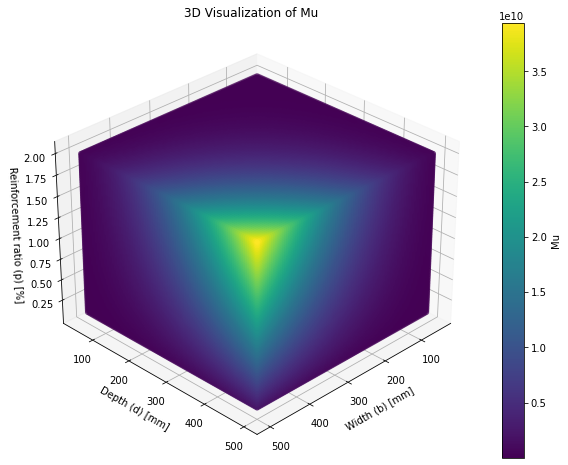

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class AnaFRPBending:
    def __init__(self, A_f, f_cm, E_f, f_fu, b, d):
        self.M_u = A_f * (f_cm / 10) * (E_f / 1000) * (f_fu / 100) * (b / 10) * (d / 10)

def f(p, b, d):
    A_f = p * b * d / 100
    Mu = AnaFRPBending(A_f=A_f, f_cm=50, E_f=70000, f_fu=900, b=b, d=d).M_u
    return Mu

p_range = np.linspace(0.1, 2, 100)   # Reinforcement ratio (Percent)
b_range = np.linspace(50, 500, 100)  # Width (mm)
d_range = np.linspace(50, 500, 100)  # Depth (mm)

b_mesh, d_mesh, p_mesh = np.meshgrid(b_range, d_range, p_range)

Mu_values = f(p_mesh, b_mesh, d_mesh)

# Flatten the arrays for 3D plotting
p_flat = p_mesh.flatten()
b_flat = b_mesh.flatten()
d_flat = d_mesh.flatten()
Mu_flat = Mu_values.flatten()

# 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(b_flat, d_flat, p_flat, c=Mu_flat, cmap='viridis')

cbar = fig.colorbar(sc)
cbar.set_label('Mu')

ax.set_xlabel('Width (b) [mm]')
ax.set_ylabel('Depth (d) [mm]')
ax.set_zlabel('Reinforcement ratio (p) [%]')
ax.set_title('3D Visualization of Mu')
ax.view_init(elev=30, azim=45)  

plt.show()
